## Watersheed
#### Grupo 1: Mariana Nakagawa,María Pardo y Gema Perez.


Índice de los pasos a seguir:
1. Preparación de imágenes 
2. Filtrado Non-Local Means
3. Modificaciones de NLM: Comparación con el mismo parche
4. Modificaciones de NLM: NLM-CPP
5. Resultados finales
6. Referencias
7. Autoría

#### 1. Preparación de las imágenes

##### Importación de librerías

En esta sección vamos a proceder a visualizar las imágenes que hemos obtenido del repositorio de bases de datos Open Neuro, para poder evaluar los resultados de filtrado que debemos realizar. 

En primer lugar, cargaremos las imágenes con las que testearemos nuestro código. Se trata de imágenes de fMRI.

In [20]:
import os
import numpy as np
import nibabel as nib #nos permite leer las imagenes
import matplotlib 
import matplotlib.pyplot as plt 
import skimage
from skimage import io
from skimage import filters
from nilearn import datasets
from nilearn import plotting
import modules

In [21]:
img1 = nib.load(r'\Users\Maria\Desktop\data\sub-01\anat\sub-01_T1w.nii.gz')
img2 = nib.load(r"\Users\Maria\Desktop\data\sub-17\anat\sub-17_T1w.nii.gz")
img3 = nib.load(r"\Users\Maria\Desktop\data\sub-26\anat\sub-26_T1w.nii.gz")
img4 = nib.load(r"\Users\Maria\Desktop\data\sub-31\anat\sub-31_T1w.nii.gz")
img5 = nib.load(r"\Users\Maria\Desktop\data\sub-13\anat\sub-13_T1w.nii.gz")
img6 = nib.load(r"\Users\Maria\Desktop\data\sub-15\anat\sub-15_T1w.nii.gz")

In [22]:
data = img1.get_fdata()  

In [23]:
print(data.shape)

(176, 256, 256)


In [24]:
print(data.dtype, img1.get_data_dtype())

float64 float32


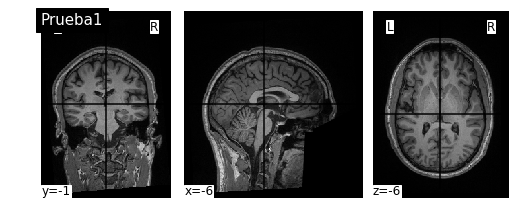

In [25]:
plotting.plot_img(img1, title="Prueba1",display_mode='ortho',cmap=plt.cm.gray )
plotting.show()  

Para poder añadirle el ruido a las imágenes, vamos a transformar los datos al formato array, y tras ello guardaremos un único corte (que hemos elegido de manera aleatoria) al que realizaremos la adición.

> En caso de querer disminuir el tiempo de ejecución descomente una de las líneas para disminuír el tamaño de las imágenes y por ende, el número de píxeles a analizar.<pre><code>a = np.array(skimage.transform.resize(img1.dataobj, (60,80)))
a = np.array(skimage.transform.rescale(img.dataobj,0.3))
</code></pre> Y comente la línea:<pre><code>a = np.array(img1.dataobj)
</code></pre>

In [26]:
#Vamos a probar los algoritmos con imágenes más pequeñas para disminuir el tiempo de computación
a = np.array(skimage.transform.resize(img1.dataobj, (120,160)))
#a = np.array(skimage.transform.rescale(img.dataobj,0.3))
#a = np.array(img1.dataobj)
a.shape

(120, 160, 256)

Una resonancia obtiene imagenes en 3D, por lo que a la hora de analizar el array obtenido, debemos tener en cuenta que las tres posiciones que obtenemos corresponden a:
1. La altura de la imagen.
2. El ancho de la imagen.
3. El número de corte.

Para poder analizar las imágenes, escogeremos un corte intermedio (128).

Normalizaremos las frecuencias de las imágenes, de forma que el rango de este nuevo histograma sea [0,1] Es decir, dividimos cada frecuencia entre el total de píxeles de la imagen.

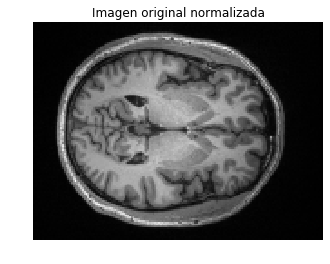

In [27]:
img_gray= a[:,:,128]
#normalizo la imagen
img_o=img_gray
img_o=img_o/np.max(img_o)
plt.title('Imagen original normalizada'), plt.axis('off')
plt.imshow(img_o, cmap=plt.cm.gray)


##### 3. Implementación algoritmo: Watershed

El algoritmo watersheed es una técnica de segmentación basada en morfología que permite encontrar regiones de una imagen.

Se considera una imagen numérica como un relieve topográfico, donde la intensidad del pixel se corresponde a la altura sobre el relieve.Si lo comparamos con la inundación del relieve topográfico, asumiendo que el agua nace de los mínimos regionales(zona plana tal que el nivel de todos los pixeles vecinos es estrictamente superior).

Hemos creado una función para el algoritmo watersheed, **WatershedExerciseP2(img)** incluida en el archivo **modules.py**, que será la encargada de implementar una aproximación del algoritmo watersheed:

1. Obtener el gradiente de la imagen:
        Hemos decidido aplicar el filtro derivativo **Sobel**. Los filtros derivativos son capaces de destacar las zonas con un alto contraste local.Estos filtros funcionan mediante el cálculo del gradiente que, en una imagen sería la diferencia de niveles de gris entre dos puntos de esta. Las zonas con un alto contraste local en una imagen son los bordes

2. Con la funcion de skimage, implementamos el algoritmo watershed cuyo parámetro será la imagen de gradiente calculada en el punto anterior.

3. Con la función **imimposemin** conseguimos modificar la imagen de tal forma que ésta tenga mínimo nivel de gris en los puntos considerados, convirtiéndose en mínimos locales. Para trabajar con esta función se deben introducir a la entrada dos imágenes:

        - La imagen de gradiente (calculada en el punto 1)
        - La imagen de máscara binaria del mismo tamaño que la imagen de gradiente, con los puntos donde queremos imponer los mínimos marcados.

4. Nuevamente, con la fución de skimage, implementamos el **algoritmo Watershed** cuyo parámetro será lo calculado con la función **imimposemin**

Using matplotlib backend: TkAgg
[[51 73]
 [68 73]]


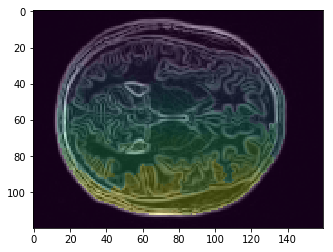

In [29]:
%matplotlib auto
watershed1, watershed2 =modules.WatershedExerciseP2(img_o)

img_sobel=filters.sobel(img_o) 

%matplotlib inline 
plt.imshow(img_sobel, cmap=plt.cm.gray)
plt.imshow(watershed1, cmap='viridis', alpha=0.3)

plt.imshow(img_sobel, cmap=plt.cm.gray)
plt.imshow(watershed2, cmap='viridis', alpha=0.3)
